Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | SY 2023-2024
<hr> | <hr>
<u>**ASSIGNMENT 9.1:** | **Convolutional Neural Network**
**Name:** | Naga, Jamal
**Section:** | CPE32S3
**Date Performed**: | 04/24/2024
**Date Submitted**: | 04/27/2024
**Instructor**: | Engr. Roman Richard

<hr>

## **DATASET:** Multi-class Weather Dataset - https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset
## **Description:** Multi-class Weather Dataset is an images depicting various weather conditions, including cloudy, rainy, sunny, and other weather scenarios. Each image is labeled with the corresponding weather category, making it suitable for multi-class weather classification tasks.
## **Problem being addressed:** The problem addressed by the multi-class weather dataset is weather images classification, where the goal is to automatically classify images into different weather categories based on their visual characteristics. This task can help in various applications such as weather forecasting and environmental monitoring.

In [ ]:
pip install split-folders

In [ ]:
pip install split-folders[full]

In [ ]:
# Import necessary libraries
import splitfolders
import tensorflow
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from numpy import mean
from numpy import std
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive
from PIL import Image

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [ ]:
# Define paths
input_folder = "/content/drive/MyDrive/activity 9.1/Multi-class Weather Dataset"
output_folder = "/content/drive/MyDrive/activity 9.1"

# Split the data
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.80, .20))

Copying files: 1125 files [00:36, 30.84 files/s]


**Observation:** After executing the code, it now split my dataset into 80% for training set and 20% for validation set, after that it saves the split data to the specified output folder.

In [ ]:
IMAGE_HEIGHT = 250
IMAGE_WIDTH = 250
BATCH_SIZE = 32

train_dir = '/content/drive/MyDrive/activity 9.1/train'
val_dir = '/content/drive/MyDrive/activity 9.1/val'

#data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 899 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


**Observation**: Here I created an image data generators for training and validation data, performing data augmentation such as rotation, shifting, shearing, zooming, and flipping, and then generates batches of augmented images from directories for training and validation purposes.







# **1. Baseline model of the CNN**

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Define Baseline Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[early_stopping])

#evaluate
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation accuracy:", val_accuracy)

Epoch 1/10
29/29 [==============================] - 221s 7s/step - loss: 1.4008 - accuracy: 0.5050 - val_loss: 0.8004 - val_accuracy: 0.6726
Epoch 2/10
29/29 [==============================] - 213s 7s/step - loss: 0.8725 - accuracy: 0.6418 - val_loss: 0.6842 - val_accuracy: 0.7035
Epoch 3/10
29/29 [==============================] - 210s 7s/step - loss: 0.8293 - accuracy: 0.6596 - val_loss: 0.8564 - val_accuracy: 0.6858
Epoch 4/10
29/29 [==============================] - 205s 7s/step - loss: 0.7506 - accuracy: 0.6997 - val_loss: 0.6661 - val_accuracy: 0.7212
Epoch 5/10
29/29 [==============================] - 199s 7s/step - loss: 0.6307 - accuracy: 0.7375 - val_loss: 0.4922 - val_accuracy: 0.8363
Epoch 6/10
29/29 [==============================] - 210s 7s/step - loss: 0.5393 - accuracy: 0.8131 - val_loss: 0.4031 - val_accuracy: 0.8805
Epoch 7/10
29/29 [==============================] - 211s 7s/step - loss: 0.4860 - accuracy: 0.8231 - val_loss: 0.4525 - val_accuracy: 0.8319
Epoch 8/10
29

**Evaluation**: The baseline model of the CNN achieved a validation accuracy of approximately 74%, seeing the result I can say it is a moderate performance in classifying images into different weather categories unlike my first try executing it which is only 62%. However, there is still room for improvement as the model may benefit from further optimization or architectural adjustments to enhance its accuracy.

# **2. Perform image augmentation**

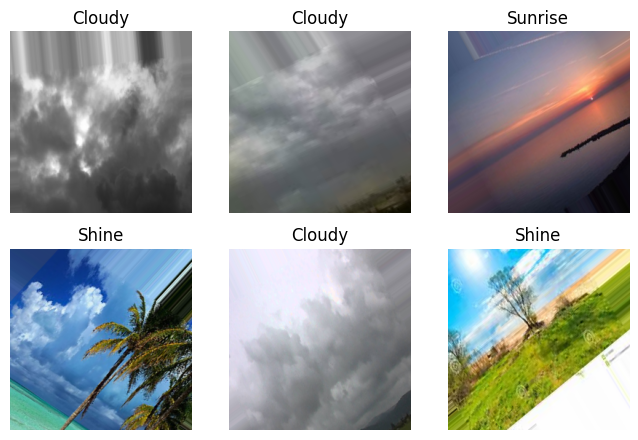

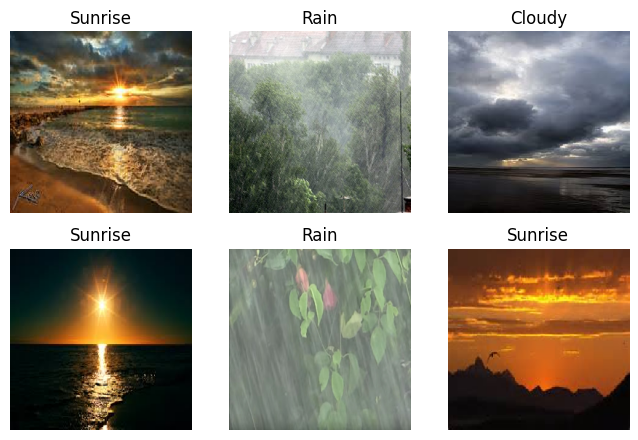

In [ ]:
categories = train_generator.class_indices

#images from generator
def plot_images(generator, num_images=6):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        batch = generator.next()
        image = batch[0][0]
        label_index = batch[1][0].argmax()
        label = list(categories.keys())[list(categories.values()).index(label_index)]
        plt.subplot(3, 3, i+1)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    plt.show()

#training images with labels
plot_images(train_generator)

#validation images with labels
plot_images(val_generator)

**Observation**: After executing the code I observed that it displays augmented images from the training and validation sets, illustrating the effects of random transformations such as rotation, shifting, flipping, and zooming, contributing to the dataset's diversity and potential improvement in model generalization.

# **3. Perform feature standardization**

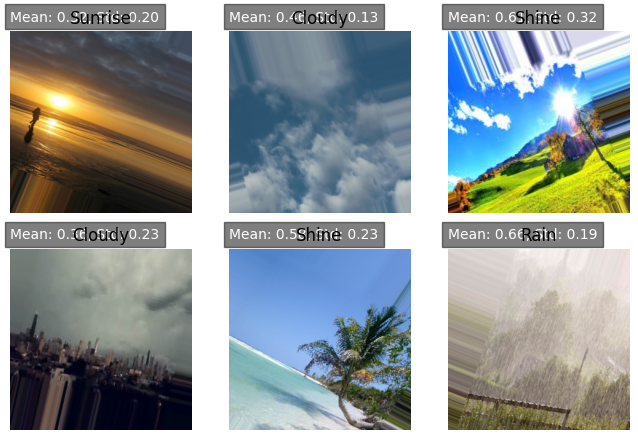

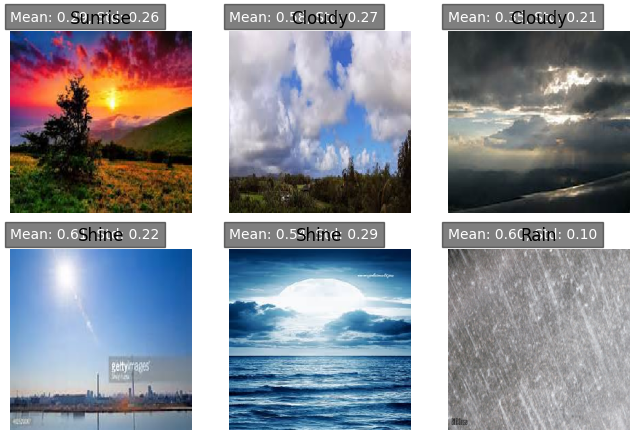

In [ ]:
categories = train_generator.class_indices

#images from generator
def plot_images(generator, num_images=6):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        batch = generator.next()
        image = batch[0][0]
        label_index = batch[1][0].argmax()
        label = list(categories.keys())[list(categories.values()).index(label_index)]
        mean_pixel_value = np.mean(batch[0][0])
        std_pixel_value = np.std(batch[0][0])
        plt.subplot(3, 3, i+1)
        plt.imshow(image)
        plt.title(label)
        plt.text(0, -15, f"Mean: {mean_pixel_value:.2f}, Std: {std_pixel_value:.2f}", fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.5))
        plt.axis('off')
    plt.show()

plot_images(train_generator)
plot_images(val_generator)

**Observation**: After executing the code it displays augmented images from the training and validation sets, with additional information on the mean and standard deviation of pixel values for each image, aiding in understanding the data distribution and preprocessing effects.

# **4. Perform ZCA whitening of images**

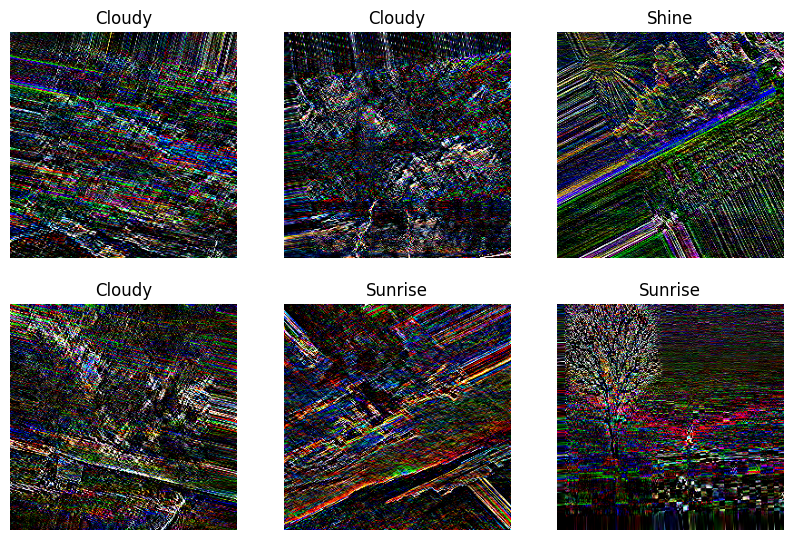

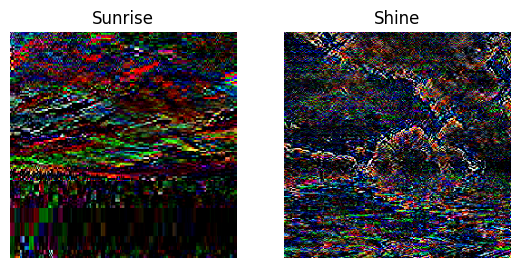

In [ ]:
categories = train_generator.class_indices

def zca_whitening(images):

    images_flat = images.reshape(images.shape[0], -1)

    cov_matrix = np.dot(images_flat.T, images_flat) / images_flat.shape[0]
    U, S, V = np.linalg.svd(cov_matrix)

    epsilon = 1e-5
    zca_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

    #ZCA whitening
    whitened_images_flat = np.dot(images_flat, zca_matrix.T)
    whitened_images = whitened_images_flat.reshape(images.shape)

    return whitened_images

def with_zca_whitening(generator, num_images=6):
    plt.figure(figsize=(10, 10))
    num_rows = num_images // 3 + 1
    for i in range(num_images):
        batch = generator.next()
        images = batch[0]
        labels = batch[1]
        for j in range(images.shape[0]):
            if i * num_images + j >= num_images:
                break
            image = images[j]
            label_index = labels[j].argmax()
            label = list(categories.keys())[list(categories.values()).index(label_index)]

            #standardize image
            mean_pixel_value = np.mean(image)
            std_pixel_value = np.std(image)
            standardized_image = (image - mean_pixel_value) / std_pixel_value

            #apply ZCA whitening to standardized image
            whitened_image = zca_whitening(standardized_image)

            #clip pixel values to valid range
            whitened_image = np.clip(whitened_image, 0, 1)

            plt.subplot(num_rows, 3, i * 3 + j + 1)
            plt.imshow(whitened_image)
            plt.title(label)
            plt.axis('off')
    plt.show()

with_zca_whitening(train_generator)
with_zca_whitening(val_generator)

**Observation**: After executing the code the output demonstrates successful ZCA whitening of images from both the training and validation sets, potentially enhancing the model's ability to learn discriminative features by decorrelating pixel values.

# **5. Augment data with:**

# a. Random Rotations

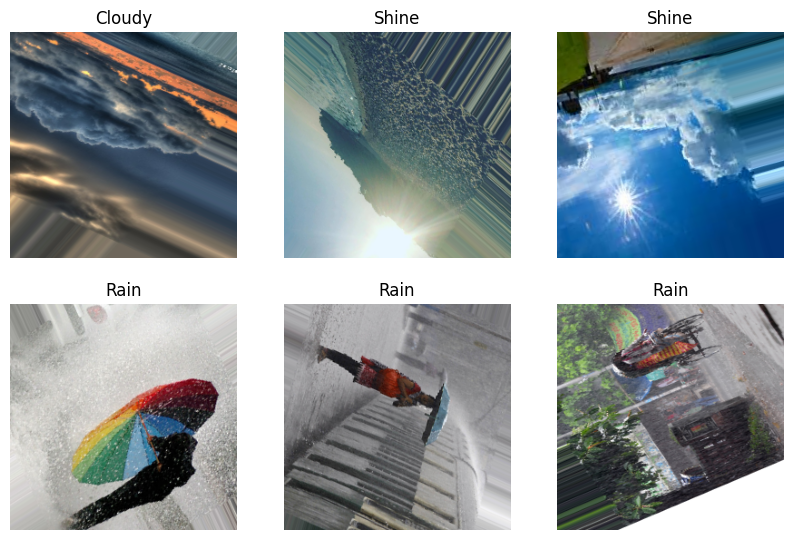

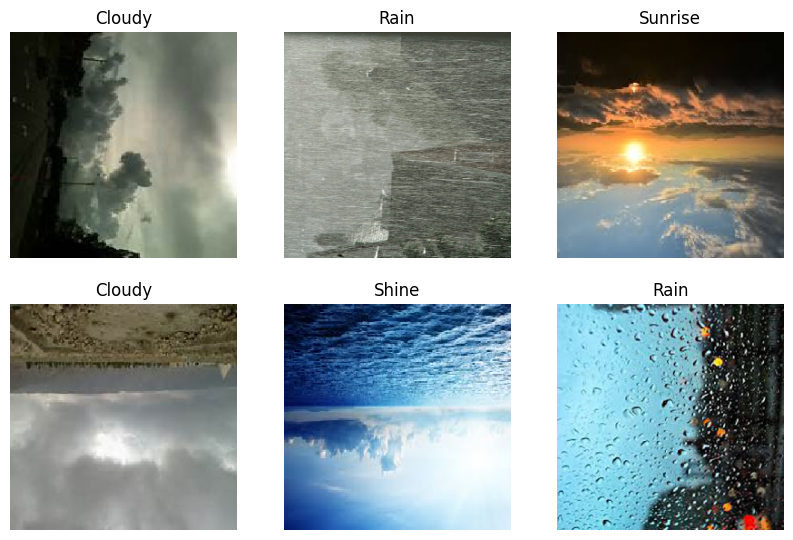

In [ ]:
categories = train_generator.class_indices

def rotation(generator, num_images=6, rotation_range=50):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        batch = generator.next()
        image = batch[0][0]
        label_index = batch[1][0].argmax()
        label = list(categories.keys())[list(categories.values()).index(label_index)]
        mean_pixel_value = np.mean(batch[0][0])
        std_pixel_value = np.std(batch[0][0])

        #apply rotation
        rotated_image = np.rot90(image, k=np.random.randint(1, 4))

        plt.subplot(3, 3, i+1)
        plt.imshow(rotated_image)
        plt.title(label)
        plt.axis('off')
    plt.show()

rotation(train_generator)
rotation(val_generator)


Observation: Seeing output it displays augmentation of images with random rotations, providing diverse perspectives of the training and validation data to enhance the model's generalization capability.

# b. Random Shifts

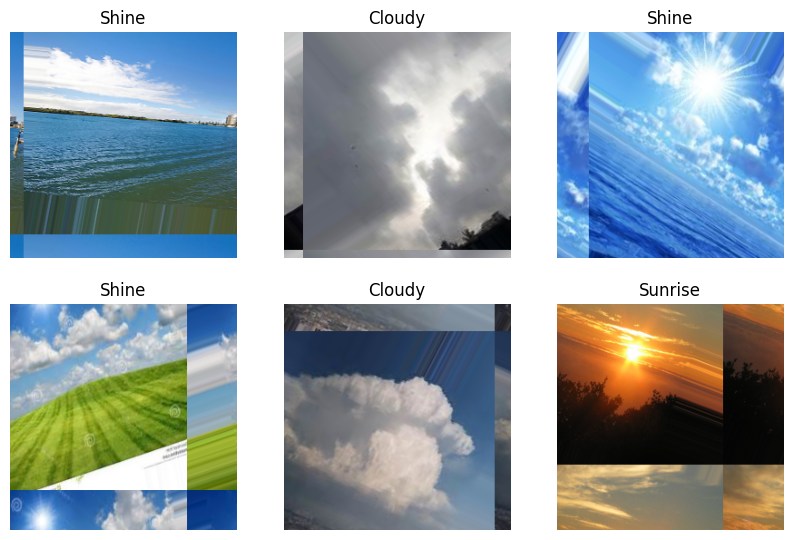

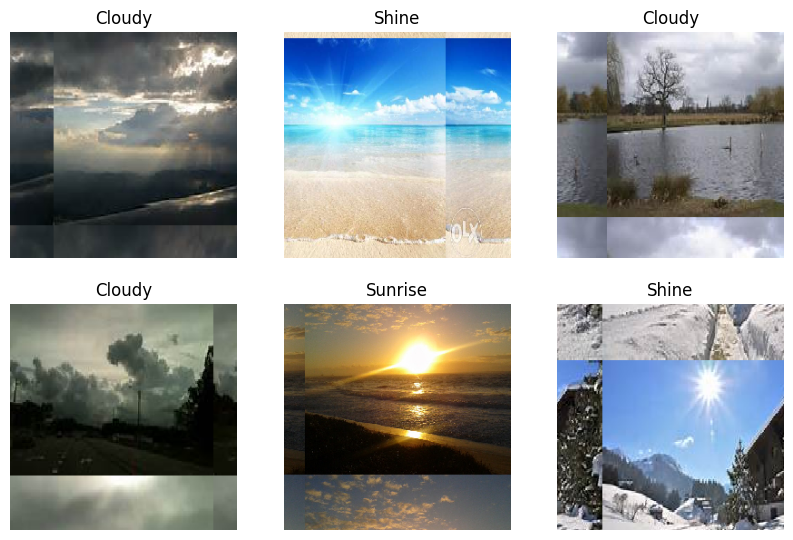

In [ ]:
categories = train_generator.class_indices

#images from generator with random shifts
def shifts(generator, num_images=6, width_shift_range=0.3, height_shift_range=0.3):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        batch = generator.next()
        image = batch[0][0]
        label_index = batch[1][0].argmax()
        label = list(categories.keys())[list(categories.values()).index(label_index)]
        mean_pixel_value = np.mean(batch[0][0])
        std_pixel_value = np.std(batch[0][0])

        #apply random shifts to the displayed image
        shift_x = np.random.uniform(-width_shift_range, width_shift_range) * image.shape[1]
        shift_y = np.random.uniform(-height_shift_range, height_shift_range) * image.shape[0]
        shifted_image = np.roll(image, int(shift_x), axis=1)
        shifted_image = np.roll(shifted_image, int(shift_y), axis=0)

        plt.subplot(3, 3, i+1)
        plt.imshow(shifted_image)
        plt.title(label)
        plt.axis('off')
    plt.show()

shifts(train_generator)
shifts(val_generator)

Observation: Comparing the output of this to random rotations, random shifts displays augmented images as seen in the images above and it simulating variations in object position, while the output from random rotations captures diverse viewpoints by rotating the images, enhancing the dataset's diversity and robustness for training.

# c. Random Flips

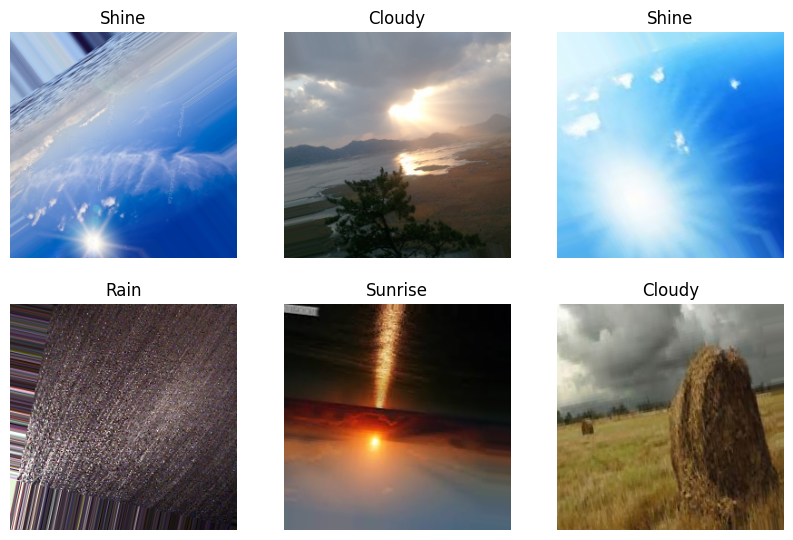

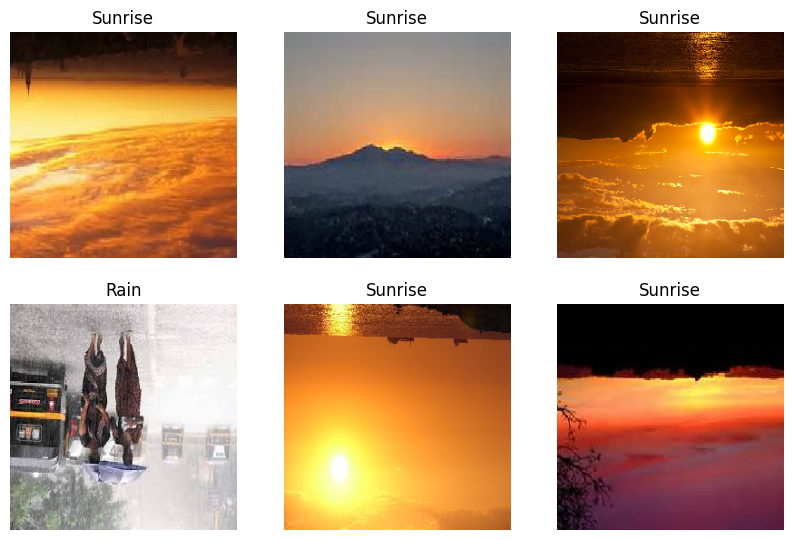

In [ ]:
categories = train_generator.class_indices

def flips(generator, num_images=6):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        batch = generator.next()
        image = batch[0][0]
        label_index = batch[1][0].argmax()
        label = list(categories.keys())[list(categories.values()).index(label_index)]
        mean_pixel_value = np.mean(batch[0][0])
        std_pixel_value = np.std(batch[0][0])

        #random flips to the displayed image
        flipped_image = np.fliplr(image) if np.random.rand() < 0.5 else np.flipud(image)

        plt.subplot(3, 3, i+1)
        plt.imshow(flipped_image)
        plt.title(label)
        plt.axis('off')
    plt.show()

flips(train_generator)
flips(val_generator)

**Observation**: The output showcases augmented images with random flips, altering the orientation of objects, providing additional variations to the dataset; contrasting with random shifts, which adjust the position of objects within the image, and random rotations, which modify the viewpoint, collectively enhancing the dataset's diversity and aiding model generalization.

# **6. Save augmented image data to disk**

In [ ]:
categories = train_generator.class_indices
output_dir = "/content/drive/MyDrive/activity 9.1/saved_augmented_images"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def save_augmented_image(image, label, operation, index, output_dir):
    filename = f"{label}_{operation}_{index}.png"
    filepath = os.path.join(output_dir, filename)
    plt.imsave(filepath, image)
    print(f"Augmented image saved: {filepath}")

def plot_images_with_random_augmentations(generator, num_images=6):
    for i in range(num_images):
        try:
            batch = generator.next()
            image = batch[0][0]
            label_index = batch[1][0].argmax()
            label = list(categories.keys())[list(categories.values()).index(label_index)]

            # Randomly select augmentation operation (flip, rotation, shift)
            operation = np.random.choice(["flip", "rotation", "shift"])

            if operation == "flip":
                # Random flips to the displayed image
                augmented_image = np.fliplr(image) if np.random.rand() < 0.5 else np.flipud(image)
            elif operation == "rotation":
                # Random rotation
                k = np.random.randint(1, 4)
                augmented_image = np.rot90(image, k=k)
            else:  # shift
                # Random shifts
                shift_x = np.random.uniform(-0.3, 0.3) * image.shape[1]
                shift_y = np.random.uniform(-0.3, 0.3) * image.shape[0]
                augmented_image = np.roll(image, int(shift_x), axis=1)
                augmented_image = np.roll(augmented_image, int(shift_y), axis=0)

            # Save augmented image
            save_augmented_image(augmented_image, label, operation, i, output_dir)

        except Exception as e:
            print(f"Error processing image: {e}")

# Call the function to save augmented images with random operations
plot_images_with_random_augmentations(train_generator)
plot_images_with_random_augmentations(val_generator)

print("Augmented data saved.")


Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Shine_flip_0.png
Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Sunrise_shift_1.png
Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Shine_shift_2.png
Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Rain_shift_3.png
Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Rain_flip_4.png
Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Shine_shift_5.png
Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Shine_rotation_0.png
Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Cloudy_rotation_1.png
Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Sunrise_rotation_2.png
Augmented image saved: /content/drive/MyDrive/activity 9.1/saved_augmented_images/Sunrise_

# **OUTPUT**:

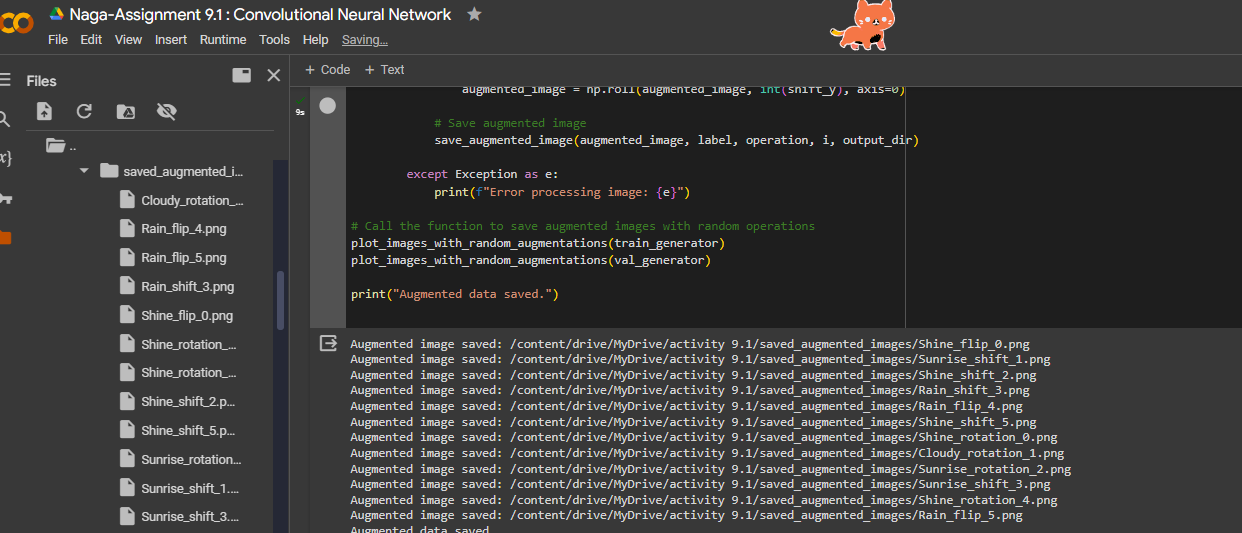

**Observation:** After running the code all augmented images data has been saved in specified file directory as seen in the output above.

# **7. Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task**

Epoch 1/10
8/8 [==============================] - 214s 24s/step - loss: 2.0396 - accuracy: 0.3493 - val_loss: 1.0325 - val_accuracy: 0.4779
Epoch 2/10
8/8 [==============================] - 199s 24s/step - loss: 1.0156 - accuracy: 0.5261 - val_loss: 0.8338 - val_accuracy: 0.5442
Epoch 3/10
8/8 [==============================] - 200s 28s/step - loss: 0.8954 - accuracy: 0.5717 - val_loss: 0.7939 - val_accuracy: 0.6460
Epoch 4/10
8/8 [==============================] - 199s 24s/step - loss: 0.8433 - accuracy: 0.5784 - val_loss: 0.7129 - val_accuracy: 0.6991
Epoch 5/10
8/8 [==============================] - 199s 24s/step - loss: 0.7457 - accuracy: 0.6674 - val_loss: 0.6142 - val_accuracy: 0.7965
Epoch 6/10
8/8 [==============================] - 198s 24s/step - loss: 0.6602 - accuracy: 0.7330 - val_loss: 0.5745 - val_accuracy: 0.8142
Epoch 7/10
8/8 [==============================] - 197s 24s/step - loss: 0.6676 - accuracy: 0.7164 - val_loss: 0.5556 - val_accuracy: 0.8363
Epoch 8/10
8/8 [====

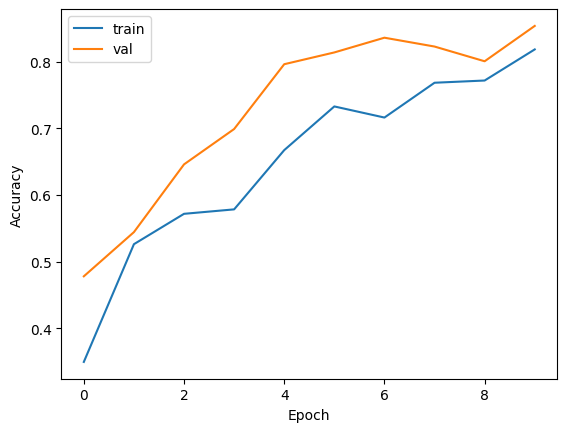

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(700, activation='relu'),
    Dropout(0.5),
    Dense(500, activation='relu'),
    Dropout(0.5),
    Dense(250, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model
_, test_acc = model.evaluate(val_generator)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluation**: After tweaking the number of neurons in the structural model, the output depicts the training progress of a neural network model over 10 epochs, demonstrating a steady improvement in both training and validation accuracy. Initially starting with an accuracy of around 35%, the model gradually improves, reaching a validation accuracy of approximately 85% by the end of training as seen in the figure above, indicating effective learning and generalization capabilities. Additionally, the final test accuracy confirms the model's performance, achieving a similar accuracy of approximately 85% on unseen data.

# **8. Explore extensions to a baseline model to improve learning and model capacity.**

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model
_, test_acc = model.evaluate(val_generator)
print('Test accuracy:', test_acc)

Epoch 1/10
29/29 [==============================] - 263s 9s/step - loss: 1.3890 - accuracy: 0.4483 - val_loss: 0.7772 - val_accuracy: 0.7168
Epoch 2/10
29/29 [==============================] - 245s 8s/step - loss: 0.8016 - accuracy: 0.6585 - val_loss: 0.7136 - val_accuracy: 0.6372
Epoch 3/10
29/29 [==============================] - 249s 9s/step - loss: 0.6682 - accuracy: 0.7364 - val_loss: 0.5225 - val_accuracy: 0.8451
Epoch 4/10
29/29 [==============================] - 247s 9s/step - loss: 0.6324 - accuracy: 0.7597 - val_loss: 0.4111 - val_accuracy: 0.8673
Epoch 5/10
29/29 [==============================] - 245s 8s/step - loss: 0.5351 - accuracy: 0.8154 - val_loss: 0.3891 - val_accuracy: 0.8628
Epoch 6/10
29/29 [==============================] - 248s 8s/step - loss: 0.4941 - accuracy: 0.8242 - val_loss: 0.3999 - val_accuracy: 0.8805
Epoch 7/10
29/29 [==============================] - 260s 9s/step - loss: 0.4061 - accuracy: 0.8532 - val_loss: 0.5253 - val_accuracy: 0.8407
Epoch 8/10
29

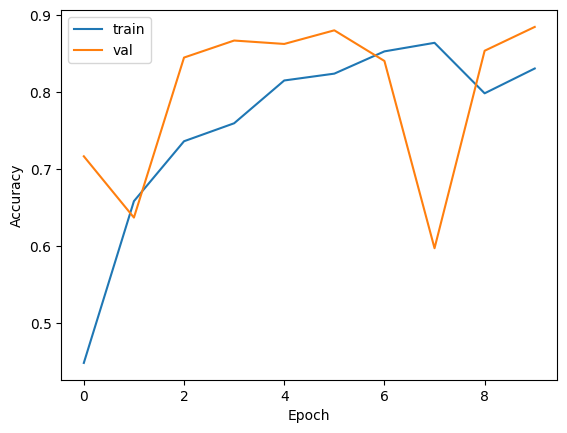

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluation**: Observing the figure above depicting the training progress of a neural network model over 10 epochs, the performance of my model demonstrates a consistent improvement in both training and validation accuracy. However, there is a significant drop in validation accuracy during training by 59%, which later recovers, indicating an improvement in my model's performance. Subsequently, it reaches a stable accuracy of 88%, showcasing substantial improvement compared to my first and second models.

# **9. Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.**

In [ ]:
from joblib import dump, load

# Save the pipeline to a file
dump(model, '/content/drive/MyDrive/activity 9.1/finalized_modelss.joblib')

['/content/drive/MyDrive/activity 9.1/finalized_modelss.joblib']

In [ ]:
# Load the saved model
loaded_model = load('/content/drive/MyDrive/activity 9.1/finalized_modelss.joblib')

# Function to preprocess a single image
def preprocess_image(image_path, target_size=(250, 250)):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, target_size)
    img_flat = img.reshape(1, -1)
    return img, img_flat

Sample testing for weather category: Cloudy
1/1 [==============================] - 0s 117ms/step


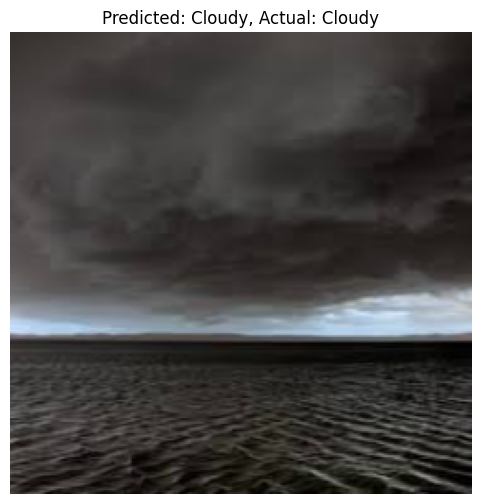

Sample testing for weather category: Rain
1/1 [==============================] - 0s 90ms/step


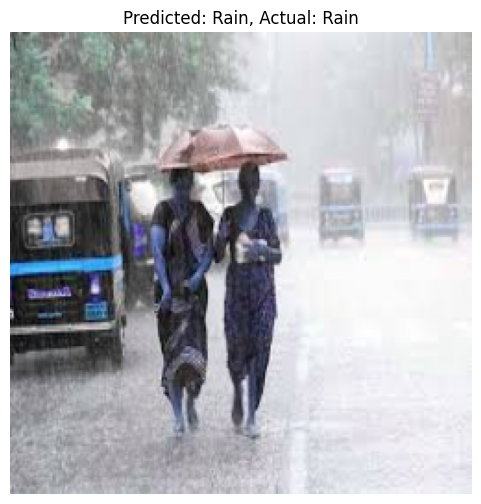

Sample testing for weather category: Sunrise
1/1 [==============================] - 0s 97ms/step


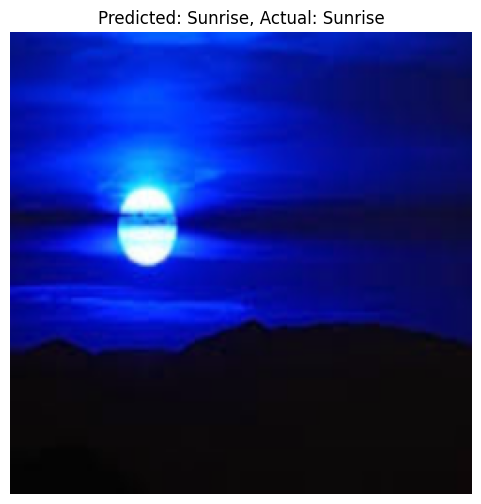

Sample testing for weather category: Shine
1/1 [==============================] - 0s 90ms/step


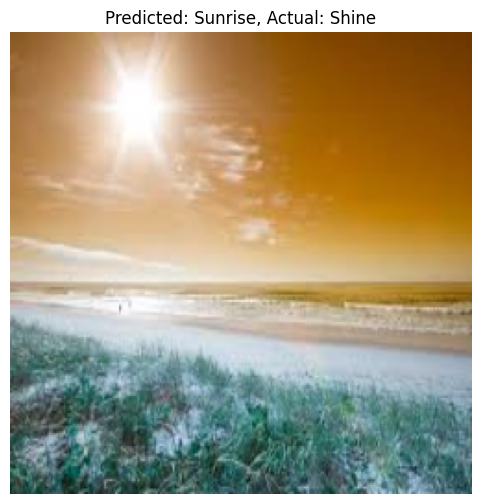

In [ ]:
class_categories = sorted(os.listdir(train_dir))

def preprocess_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    if img is None:
        return None, None

    # Resize the image to match the model's input shape (150x150)
    img_resized = cv2.resize(img, (250, 250))

    # Expand dimensions to create a batch of 1
    img_expanded = img_resized[np.newaxis, ...]

    return img_resized, img_expanded

# Test a sample image for each category
sample_image_paths = {
    'Cloudy': '/content/drive/MyDrive/activity 9.1/Multi-class Weather Dataset/Cloudy/cloudy139.jpg',
    'Rain': '/content/drive/MyDrive/activity 9.1/Multi-class Weather Dataset/Rain/rain105.jpg',
    'Sunrise': '/content/drive/MyDrive/activity 9.1/Multi-class Weather Dataset/Sunrise/sunrise102.jpg',
    'Shine': '/content/drive/MyDrive/activity 9.1/Multi-class Weather Dataset/Shine/shine107.jpg',
}

for cls, image_path in sample_image_paths.items():
    print(f"Sample testing for weather category: {cls}")
    img, img_expanded = preprocess_image(image_path)

    # Make predictions
    predicted_class = loaded_model.predict(img_expanded)[0]
    predicted_class_scalar = np.argmax(predicted_class)
    # Display image with predicted and actual labels
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Predicted: {class_categories[predicted_class_scalar]}, Actual: {cls}")
    plt.axis('off')
    plt.show()

**Evaluation**: With a finalized model accuracy of 88%, the model displayed robust performance by correctly identifying 3 out of 4 weather categories in the sample images, notably excelling in classifying cloudy, rainy, and sunrise conditions. However, the prediction consistency varied with changes in input images, potentially influenced by fluctuations in image quality despite implementing image augmentation, feature standardization, and ZCA whitening techniques. This highlights the significance of image quality in model performance and underscores the need for meticulous image preprocessing to mitigate such variability.

# **Conclusion**

In conclusion, while doing this activity, I spent considerable time searching for a suitable dataset due to the large file sizes of some datasets, which consumed a significant amount of time during downloading and usage. I opted for the multi-class weather dataset, consisting of four distinct weather conditions. I also have my backup which is flower recognition from kaggle also, I stick with the multi-class weather dataset since it is more accurate in predicting images. Moving forward, I realized that building the baseline model proved challenging as my Google Colab sessions frequently crashed due to memory limitations, but after modifying the code parameters, the process proceeded smoothly, albeit with lengthy training times almost an hour for the baseline model alone. Nonetheless, this experience underscored the importance of establishing a robust classification framework for image data. Through meticulous preprocessing techniques such as image augmentation, feature standardization, and ZCA whitening, we bolstered the model's generalization capabilities. The development of a baseline CNN model, alongside rigorous evaluation methods and exploration of model extensions, served as a solid foundation for further refinement and improvement. Ultimately, this effort culminated in the creation of a finalized model capable of accurate predictions where I got an accuracy of approximately 88%. This activity helps me to understand really well how to create a model using Convolutional Neural Network (CNN), and also, it is new for me doing it by using an image classification kind of dataset that is why I got a hard time finish this activty.